# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [73]:
#Import all the necessary modules
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [74]:
pima = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [75]:
pima.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Q2. Print 10 samples from the dataset

In [77]:
pima.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
300,0,167,0,0,0,32.3,0.839,30,1
464,10,115,98,0,0,24.0,1.022,34,0
150,1,136,74,50,204,37.4,0.399,24,0
171,6,134,70,23,130,35.4,0.542,29,1
243,6,119,50,22,176,27.1,1.318,33,1
615,3,106,72,0,0,25.8,0.207,27,0
252,2,90,80,14,55,24.4,0.249,24,0
331,2,87,58,16,52,32.7,0.166,25,0
299,8,112,72,0,0,23.6,0.840,58,0
579,2,197,70,99,0,34.7,0.575,62,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [78]:
# We actually could see it using dataset.info() like in above
# Below is the specific way for doing it
pima.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [79]:
pima.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [80]:
# To identify Number of 0's in dataset we can do following
pima.min()

# Here we can see list of columns having zero values
# No. Of Pregnancy can be 0
# Class is in range of 0 & 1
# For rest of the missing values we can replace it with other methods

Preg      0.000
Plas      0.000
Pres      0.000
skin      0.000
test      0.000
mass      0.000
pedi      0.078
age      21.000
class     0.000
dtype: float64

# Q4 Replace all the invalid 0s in the column ( based on your understanding of the data) with the median of the same column value accordingly.

In [81]:
pima[['Plas','Pres','skin','test','mass']].replace(0, pima[['Plas','Pres','skin','test','mass']].median(), inplace=True)
pima.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
530,2,122,60,18,106,29.8,0.717,22,0
600,1,108,88,19,0,27.1,0.400,24,0
528,0,117,66,31,188,30.8,0.493,22,0
211,0,147,85,54,0,42.8,0.375,24,0
170,6,102,82,0,0,30.8,0.180,36,1
348,3,99,62,19,74,21.8,0.279,26,0
621,2,92,76,20,0,24.2,1.698,28,0
421,2,94,68,18,76,26.0,0.561,21,0
0,6,148,72,35,0,33.6,0.627,50,1
649,0,107,60,25,0,26.4,0.133,23,0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [82]:
pima.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

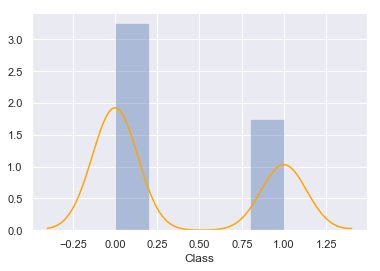

In [83]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

sns.set(rc={'figure.figsize':(6,4)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.distplot(a=pima['class'], kde_kws={"color":'orange'}, axlabel='Class')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


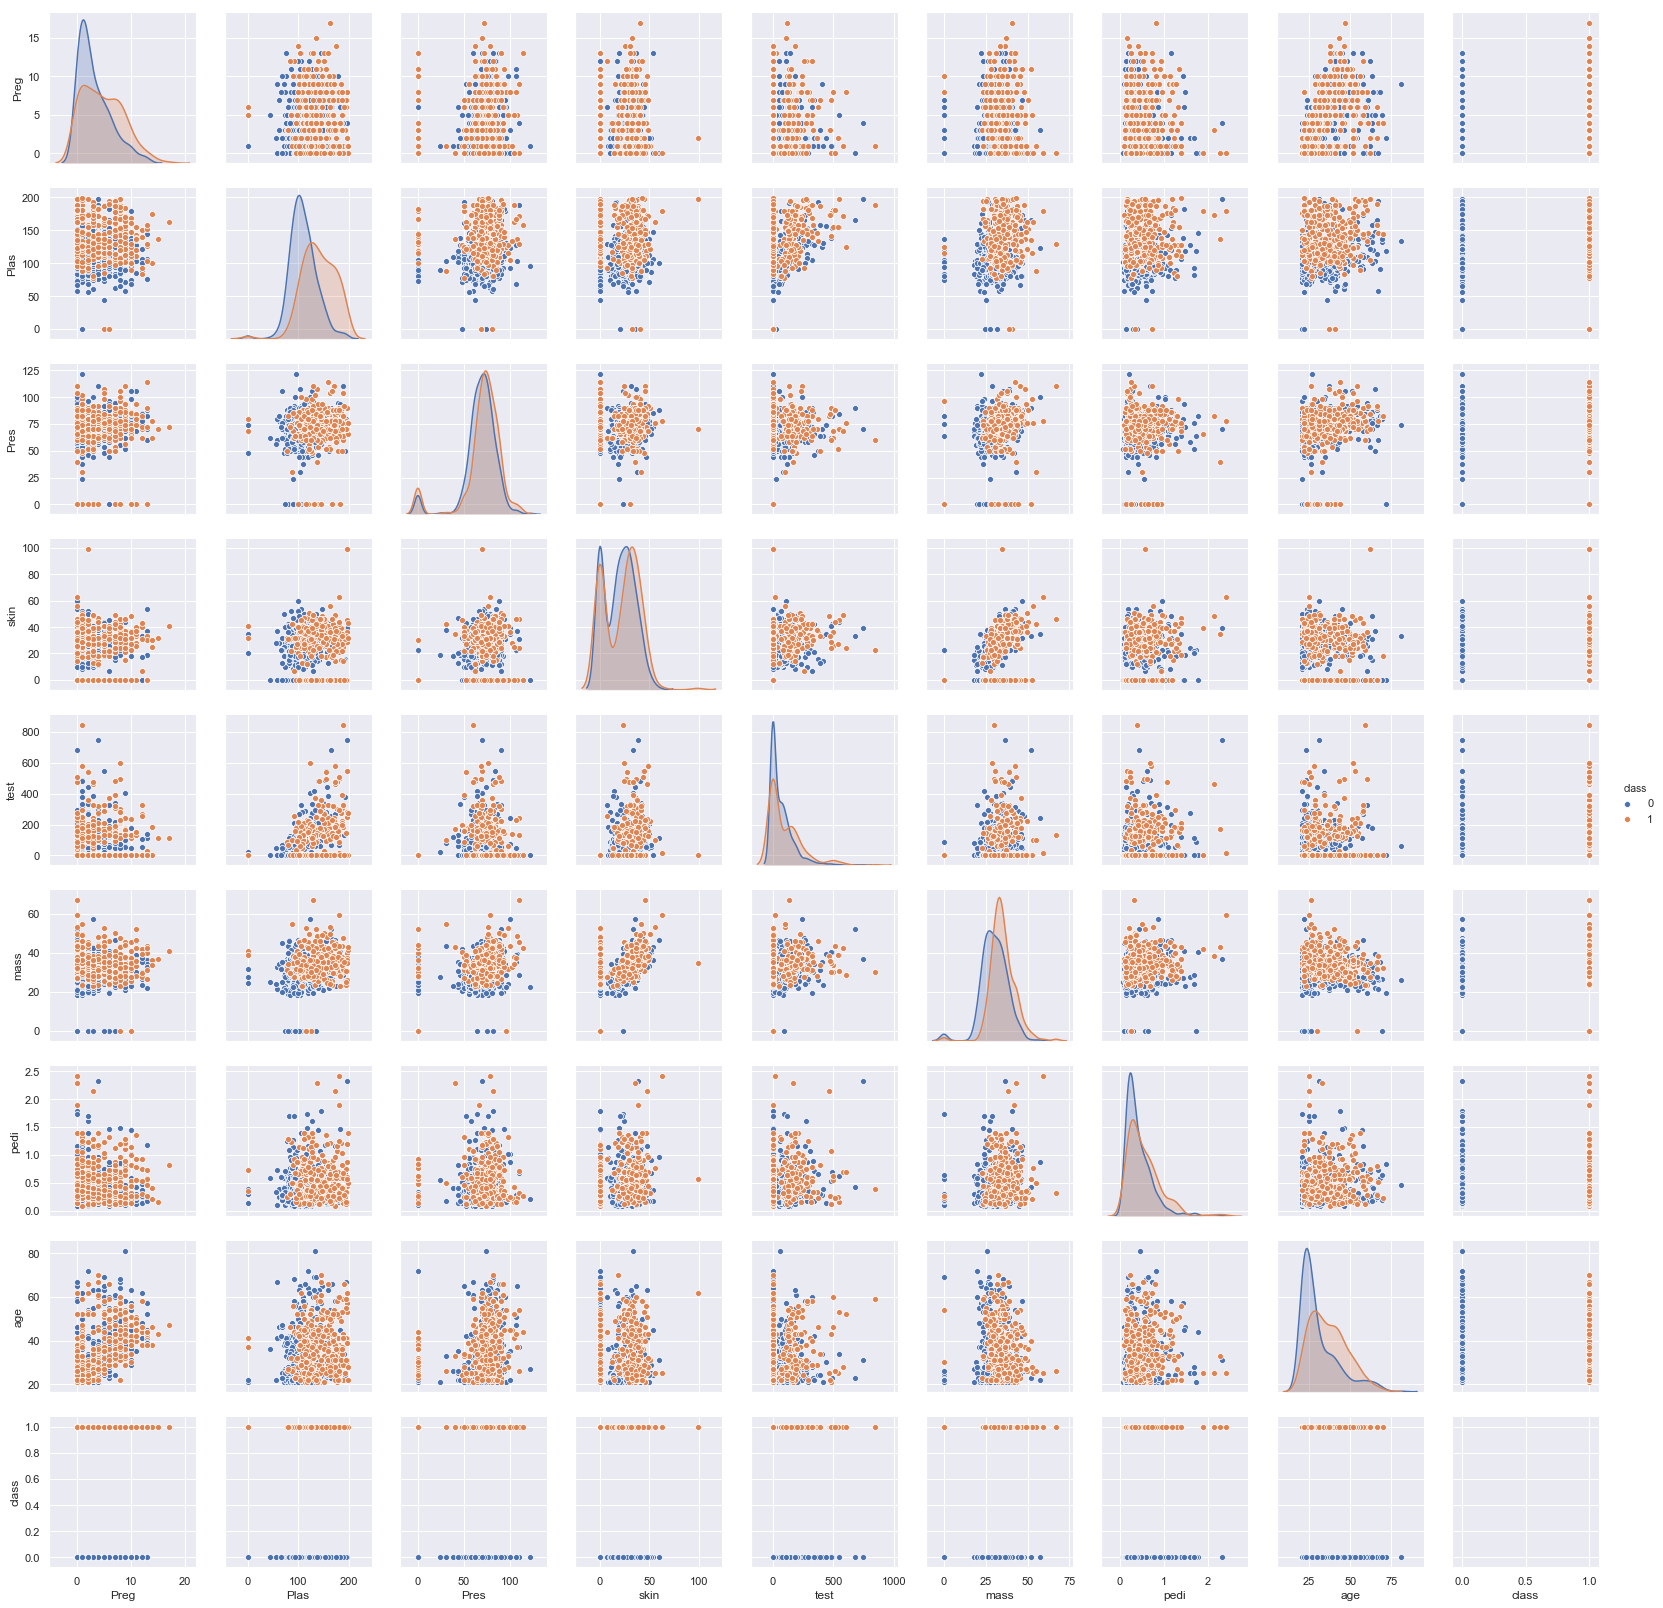

In [84]:
sns.pairplot(pima, hue='class')

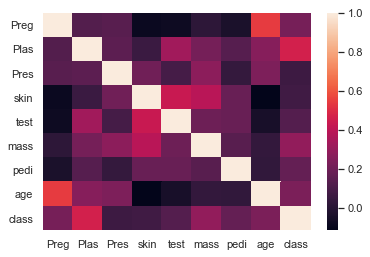

In [85]:
sns.heatmap(pima.corr())

In [86]:
pima.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Using the plot - infer the relationship between different variables

1. Glucose Plasma is one of the major factor in deriving Outcome Class (Diebetic / No)
2. Glucose Plasma, Mass and Age collectively can contribute deriving Outcome Class (Diebetic / No) at great extent
3. We can ignore this good co-relation in between age and Pregnancy count as obviously more the age

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [87]:
x = pima.drop(['class'],axis=1)
y = pima[['class']]

print(x.shape)
print(y.shape)

(768, 8)
(768, 1)


In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [89]:
dt_model=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)

In [90]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [101]:
print("Training Accuracy: ", dt_model.score(x_train, y_train))
print("Testing Accuracy : ", dt_model.score(x_test, y_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_model.predict(x_test)))

Training Accuracy:  0.7635009310986964
Testing Accuracy :  0.7316017316017316

Confusion Matrix:
[[145  12]
 [ 50  24]]


Print the feature importance of the decision model - Optional

In [98]:
print("Feature & Importance Values:")

i = 0
for col in pima.drop(['class'], axis=1).columns:
    print(col, ":", dt_model.feature_importances_[i])
    i += 1

Feature & Importance:
Preg : 0.0
Plas : 0.5478037733889963
Pres : 0.0
skin : 0.0
test : 0.0
mass : 0.21526651972585217
pedi : 0.03966333760357603
age : 0.19726636928157554


Plasma count is having heighest feature importance as we already predicted using correlation matrics.

# Thank You!